In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from torchvision.utils import save_image
import os

class GrayscaleColorizationDataset(Dataset):
    def __init__(self, grayscale_dir, color_dir, transform=None):
        """
        grayscale_dir: Directory with the grayscale images.
        color_dir: Directory with the color images.
        transform: PyTorch transforms for transforms and tensor conversion.
        """
        self.grayscale_dataset = ImageFolder(grayscale_dir, transform=transform)
        self.color_dataset = ImageFolder(color_dir, transform=transform)
        self.transform = transform

        assert len(self.grayscale_dataset) == len(self.color_dataset), \
            "Mismatched number of images between grayscale and color datasets."

    def __len__(self):
        return len(self.grayscale_dataset)

    def __getitem__(self, idx):
        grayscale_image, _ = self.grayscale_dataset[idx]
        color_image, _ = self.color_dataset[idx]
        return grayscale_image, color_image

def save_colorized_images(model, dataloader, output_dir):
    model.eval()
    os.makedirs(output_dir, exist_ok=True)
    with torch.no_grad():
        for i, (inputs, _) in enumerate(dataloader):
            outputs = model(inputs)
            save_image(outputs, os.path.join(output_dir, f"colorized_{i}.png"))

In [ ]:


from torch.utils.data import DataLoader
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images to a fixed size.
    transforms.ToTensor(),  # Convert images to PyTorch tensors.
])

training_data = GrayscaleColorizationDataset(
    grayscale_dir=r'/content/drive/MyDrive/dataset/gray_training_set',
    color_dir=r'/content/drive/MyDrive/dataset/training_set',
    transform=transform
)

validation_data = GrayscaleColorizationDataset(
    grayscale_dir=r'/content/drive/MyDrive/dataset/gray_validation_set',
    color_dir=r'/content/drive/MyDrive/dataset/validation_set',
    transform=transform
)

training_loader = DataLoader(training_data, num_workers=0, batch_size=32, shuffle=True)
validation_loader = DataLoader(validation_data, num_workers=0, batch_size=16, shuffle=True)



In [ ]:
import torch
from torch import nn

class BaseColor(nn.Module):
	def __init__(self):
		super(BaseColor, self).__init__()

		self.l_cent = 50.
		self.l_norm = 100.
		self.ab_norm = 110.

	def normalize_l(self, in_l):
		return (in_l-self.l_cent)/self.l_norm

	def unnormalize_l(self, in_l):
		return in_l*self.l_norm + self.l_cent

	def normalize_ab(self, in_ab):
		return in_ab/self.ab_norm

	def unnormalize_ab(self, in_ab):
		return in_ab*self.ab_norm

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
class ECCVGenerator(BaseColor):
    def __init__(self, norm_layer=nn.BatchNorm2d):
        super(ECCVGenerator, self).__init__()

        model1=[nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=True),]
        model1+=[nn.ReLU(True),]
        model1+=[nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1, bias=True),]
        model1+=[nn.ReLU(True),]
        model1+=[norm_layer(64),]

        model2=[nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1, bias=True),]
        model2+=[nn.ReLU(True),]
        model2+=[nn.Conv2d(128, 128, kernel_size=3, stride=2, padding=1, bias=True),]
        model2+=[nn.ReLU(True),]
        model2+=[norm_layer(128),]

        model3=[nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1, bias=True),]
        model3+=[nn.ReLU(True),]
        model3+=[nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True),]
        model3+=[nn.ReLU(True),]
        model3+=[nn.Conv2d(256, 256, kernel_size=3, stride=2, padding=1, bias=True),]
        model3+=[nn.ReLU(True),]
        model3+=[norm_layer(256),]

        model4=[nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model4+=[nn.ReLU(True),]
        model4+=[nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model4+=[nn.ReLU(True),]
        model4+=[nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model4+=[nn.ReLU(True),]
        model4+=[norm_layer(512),]

        model5=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model5+=[nn.ReLU(True),]
        model5+=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model5+=[nn.ReLU(True),]
        model5+=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model5+=[nn.ReLU(True),]
        model5+=[norm_layer(512),]

        model6=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model6+=[nn.ReLU(True),]
        model6+=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model6+=[nn.ReLU(True),]
        model6+=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model6+=[nn.ReLU(True),]
        model6+=[norm_layer(512),]

        model7=[nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model7+=[nn.ReLU(True),]
        model7+=[nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model7+=[nn.ReLU(True),]
        model7+=[nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model7+=[nn.ReLU(True),]
        model7+=[norm_layer(512),]

        model8=[nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=True),]
        model8+=[nn.ReLU(True),]
        model8+=[nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True),]
        model8+=[nn.ReLU(True),]
        model8+=[nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True),]
        model8+=[nn.ReLU(True),]

        model8+=[nn.Conv2d(256, 256, kernel_size=1, stride=1, padding=0, bias=True),]

        self.model1 = nn.Sequential(*model1)
        self.model2 = nn.Sequential(*model2)
        self.model3 = nn.Sequential(*model3)
        self.model4 = nn.Sequential(*model4)
        self.model5 = nn.Sequential(*model5)
        self.model6 = nn.Sequential(*model6)
        self.model7 = nn.Sequential(*model7)
        self.model8 = nn.Sequential(*model8)
        # Additional upsampling to correct size
        self.final_upsample = nn.Upsample(scale_factor=4, mode='bilinear', align_corners=False)

        self.final_conv = nn.Conv2d(256, 3, kernel_size=3, stride=1, padding=1)
        self.final_activation = nn.Tanh()

    def forward(self, input_l):
        conv1_2 = self.model1(self.normalize_l(input_l))
        conv2_2 = self.model2(conv1_2)
        conv3_3 = self.model3(conv2_2)
        conv4_3 = self.model4(conv3_3)
        conv5_3 = self.model5(conv4_3)
        conv6_3 = self.model6(conv5_3)
        conv7_3 = self.model7(conv6_3)
        conv8_3 = self.model8(conv7_3)
        upsampled = self.final_upsample(conv8_3)
        final_out = self.final_conv(upsampled)
        out_tanh = self.final_activation(final_out)
        # Adjust from [-1, 1] to [0, 1] if still needed
        out_adjusted = (out_tanh + 1) / 2
        return out_adjusted

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
print("Torch version:",torch.__version__)
print(torch.cuda.is_available())  # Should return True if CUDA is available
print(torch.version.cuda)          # Should print the CUDA version used by PyTorch
print(torch.cuda.get_device_name(0))

Torch version: 2.2.1+cu121
True
12.1
NVIDIA A100-SXM4-40GB


In [ ]:
import torch
import torchvision

class PerceptualLoss(torch.nn.Module):
    def __init__(self, resize=True):
        super(PerceptualLoss, self).__init__()
        self.blocks = torch.nn.ModuleList([
            torchvision.models.vgg16(pretrained=True).features[:4].eval(),
            torchvision.models.vgg16(pretrained=True).features[4:9].eval(),
            torchvision.models.vgg16(pretrained=True).features[9:16].eval(),
            torchvision.models.vgg16(pretrained=True).features[16:23].eval()
        ])
        for bl in self.blocks:
            for p in bl.parameters():
                p.requires_grad = False

        self.transform = torch.nn.functional.interpolate
        self.mean = torch.nn.Parameter(torch.tensor([0.485, 0.456, 0.406], device='cuda').view(1,3,1,1), requires_grad=False)
        self.std = torch.nn.Parameter(torch.tensor([0.229, 0.224, 0.225], device='cuda').view(1,3,1,1), requires_grad=False)
        self.resize = resize

    def forward(self, input, target):
        if input.shape[1] != 3:
            input = input.repeat(1, 3, 1, 1)
            target = target.repeat(1, 3, 1, 1)
        input = (input - self.mean) / self.std
        target = (target - self.mean) / self.std
        if self.resize:
            input = self.transform(input, mode='bilinear', size=(224, 224), align_corners=False)
            target = self.transform(target, mode='bilinear', size=(224, 224), align_corners=False)

        total_l1_loss = 0.0
        point_wise_l2_loss = torch.nn.functional.mse_loss(input, target)
        x = input
        y = target
        for block in self.blocks:
            x = block(x)
            y = block(y)
            total_l1_loss += torch.nn.functional.l1_loss(x, y)

        weight_l1 = 0.7
        weight_l2 = 0.3

        combined_loss = weight_l1 * total_l1_loss + weight_l2 * point_wise_l2_loss
        return combined_loss


In [ ]:
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import OneCycleLR

model = ECCVGenerator().cuda()  # Initialize your model
criterion = PerceptualLoss().cuda()
initial_lr = 0.00005
optimizer = torch.optim.Adam(model.parameters(), lr=initial_lr)


num_epochs = 80

scheduler = OneCycleLR(optimizer, max_lr = 0.0001, epochs=num_epochs, steps_per_epoch=len(training_loader))
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    train_loss = 0.0
    train_loader = tqdm(training_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Training]')

    for inputs, targets in train_loader:
        inputs, targets = inputs.cuda(), targets.cuda()
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        scheduler.step()
        train_loss += loss.item()
        train_loader.set_postfix(loss=loss.item())

    avg_train_loss = train_loss / len(training_loader)
    training_losses.append(avg_train_loss)
    print(f'\nEpoch {epoch+1}, Training Loss: {avg_train_loss:.4f}')

    model.eval()  # Set the model to evaluation mode
    validation_loss = 0.0
    validation_loader_tqdm = tqdm(validation_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Validation]')
    with torch.no_grad():
        for inputs, targets in validation_loader_tqdm:
            inputs, targets = inputs.cuda(), targets.cuda()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            validation_loss += loss.item()
            validation_loader_tqdm.set_postfix(loss=loss.item())

    avg_validation_loss = validation_loss / len(validation_loader)
    validation_losses.append(avg_validation_loss)
    print(f'\nEpoch {epoch+1}, Validation Loss: {avg_validation_loss:.4f}')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 175MB/s]
Epoch 1/80 [Training]:  81%|████████  | 196/242 [1:20:34<18:13, 23.77s/it, loss=2]/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes s


Epoch 1, Training Loss: 2.1529


Epoch 1/80 [Validation]: 100%|██████████| 54/54 [10:14<00:00, 11.38s/it, loss=2.17]



Epoch 1, Validation Loss: 2.0198


Epoch 2/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.24s/it, loss=1.92]



Epoch 2, Training Loss: 1.9821


Epoch 2/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  3.00it/s, loss=2.18]



Epoch 2, Validation Loss: 1.9582


Epoch 3/80 [Training]: 100%|██████████| 242/242 [05:00<00:00,  1.24s/it, loss=1.99]



Epoch 3, Training Loss: 1.9438


Epoch 3/80 [Validation]: 100%|██████████| 54/54 [00:17<00:00,  3.00it/s, loss=1.57]



Epoch 3, Validation Loss: 1.9494


Epoch 4/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.24s/it, loss=1.8]



Epoch 4, Training Loss: 1.9273


Epoch 4/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.98it/s, loss=1.79]



Epoch 4, Validation Loss: 1.9198


Epoch 5/80 [Training]: 100%|██████████| 242/242 [05:00<00:00,  1.24s/it, loss=1.93]



Epoch 5, Training Loss: 1.9111


Epoch 5/80 [Validation]: 100%|██████████| 54/54 [00:17<00:00,  3.01it/s, loss=2.2]



Epoch 5, Validation Loss: 2.1555


Epoch 6/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.24s/it, loss=1.86]



Epoch 6, Training Loss: 1.8835


Epoch 6/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.97it/s, loss=2.17]



Epoch 6, Validation Loss: 2.1875


Epoch 7/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=1.46]



Epoch 7, Training Loss: 1.8294


Epoch 7/80 [Validation]: 100%|██████████| 54/54 [00:17<00:00,  3.00it/s, loss=1.79]



Epoch 7, Validation Loss: 1.9638


Epoch 8/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=1.48]



Epoch 8, Training Loss: 1.7696


Epoch 8/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.95it/s, loss=1.82]



Epoch 8, Validation Loss: 1.9479


Epoch 9/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=2.19]



Epoch 9, Training Loss: 1.7109


Epoch 9/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.98it/s, loss=1.89]



Epoch 9, Validation Loss: 2.1457


Epoch 10/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=1.51]



Epoch 10, Training Loss: 1.6547


Epoch 10/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.98it/s, loss=2.41]



Epoch 10, Validation Loss: 2.1641


Epoch 11/80 [Training]: 100%|██████████| 242/242 [05:00<00:00,  1.24s/it, loss=1.77]



Epoch 11, Training Loss: 1.6134


Epoch 11/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  3.00it/s, loss=2.69]



Epoch 11, Validation Loss: 2.8051


Epoch 12/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=1.82]



Epoch 12, Training Loss: 1.5809


Epoch 12/80 [Validation]: 100%|██████████| 54/54 [00:17<00:00,  3.02it/s, loss=3.32]



Epoch 12, Validation Loss: 3.0920


Epoch 13/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=1.29]



Epoch 13, Training Loss: 1.5454


Epoch 13/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.98it/s, loss=1.66]



Epoch 13, Validation Loss: 1.8846


Epoch 14/80 [Training]: 100%|██████████| 242/242 [05:02<00:00,  1.25s/it, loss=1.46]



Epoch 14, Training Loss: 1.5143


Epoch 14/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.99it/s, loss=4.82]



Epoch 14, Validation Loss: 4.5554


Epoch 15/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=1.66]



Epoch 15, Training Loss: 1.4711


Epoch 15/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.98it/s, loss=3]



Epoch 15, Validation Loss: 2.9693


Epoch 16/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=1.24]



Epoch 16, Training Loss: 1.4314


Epoch 16/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.97it/s, loss=1.88]



Epoch 16, Validation Loss: 1.9838


Epoch 17/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=1.75]



Epoch 17, Training Loss: 1.3977


Epoch 17/80 [Validation]: 100%|██████████| 54/54 [00:17<00:00,  3.00it/s, loss=2.13]



Epoch 17, Validation Loss: 2.2101


Epoch 18/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=1.45]



Epoch 18, Training Loss: 1.3664


Epoch 18/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.98it/s, loss=2.53]



Epoch 18, Validation Loss: 2.1118


Epoch 19/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=1.28]



Epoch 19, Training Loss: 1.3347


Epoch 19/80 [Validation]: 100%|██████████| 54/54 [00:17<00:00,  3.00it/s, loss=2.6]



Epoch 19, Validation Loss: 2.4134


Epoch 20/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=1.27]



Epoch 20, Training Loss: 1.3160


Epoch 20/80 [Validation]: 100%|██████████| 54/54 [00:17<00:00,  3.02it/s, loss=1.86]



Epoch 20, Validation Loss: 2.0129


Epoch 21/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=1.45]



Epoch 21, Training Loss: 1.2951


Epoch 21/80 [Validation]: 100%|██████████| 54/54 [00:17<00:00,  3.02it/s, loss=2.28]



Epoch 21, Validation Loss: 2.2245


Epoch 22/80 [Training]: 100%|██████████| 242/242 [05:00<00:00,  1.24s/it, loss=1.59]



Epoch 22, Training Loss: 1.2813


Epoch 22/80 [Validation]: 100%|██████████| 54/54 [00:17<00:00,  3.03it/s, loss=3.55]



Epoch 22, Validation Loss: 3.8963


Epoch 23/80 [Training]: 100%|██████████| 242/242 [05:00<00:00,  1.24s/it, loss=1]



Epoch 23, Training Loss: 1.2703


Epoch 23/80 [Validation]: 100%|██████████| 54/54 [00:17<00:00,  3.01it/s, loss=2.38]



Epoch 23, Validation Loss: 2.3119


Epoch 24/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=1.45]



Epoch 24, Training Loss: 1.2488


Epoch 24/80 [Validation]: 100%|██████████| 54/54 [00:17<00:00,  3.01it/s, loss=2.04]



Epoch 24, Validation Loss: 2.3004


Epoch 25/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=1.61]



Epoch 25, Training Loss: 1.2384


Epoch 25/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.96it/s, loss=2.73]



Epoch 25, Validation Loss: 2.6027


Epoch 26/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=1.44]



Epoch 26, Training Loss: 1.2205


Epoch 26/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.96it/s, loss=2.28]



Epoch 26, Validation Loss: 2.2325


Epoch 27/80 [Training]: 100%|██████████| 242/242 [05:02<00:00,  1.25s/it, loss=1.31]



Epoch 27, Training Loss: 1.2048


Epoch 27/80 [Validation]: 100%|██████████| 54/54 [00:17<00:00,  3.01it/s, loss=1.77]



Epoch 27, Validation Loss: 1.8395


Epoch 28/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=1.02]



Epoch 28, Training Loss: 1.1914


Epoch 28/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  3.00it/s, loss=2.24]



Epoch 28, Validation Loss: 2.2975


Epoch 29/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=1.47]



Epoch 29, Training Loss: 1.1766


Epoch 29/80 [Validation]: 100%|██████████| 54/54 [00:17<00:00,  3.00it/s, loss=1.62]



Epoch 29, Validation Loss: 1.9372


Epoch 30/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=1.35]



Epoch 30, Training Loss: 1.1668


Epoch 30/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  3.00it/s, loss=1.73]



Epoch 30, Validation Loss: 2.0871


Epoch 31/80 [Training]: 100%|██████████| 242/242 [05:02<00:00,  1.25s/it, loss=1.15]



Epoch 31, Training Loss: 1.1528


Epoch 31/80 [Validation]: 100%|██████████| 54/54 [00:17<00:00,  3.02it/s, loss=2.03]



Epoch 31, Validation Loss: 1.7255


Epoch 32/80 [Training]: 100%|██████████| 242/242 [05:02<00:00,  1.25s/it, loss=0.945]



Epoch 32, Training Loss: 1.1440


Epoch 32/80 [Validation]: 100%|██████████| 54/54 [00:17<00:00,  3.00it/s, loss=2.23]



Epoch 32, Validation Loss: 2.2677


Epoch 33/80 [Training]: 100%|██████████| 242/242 [05:02<00:00,  1.25s/it, loss=0.94]



Epoch 33, Training Loss: 1.1310


Epoch 33/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.95it/s, loss=1.92]



Epoch 33, Validation Loss: 1.7349


Epoch 34/80 [Training]: 100%|██████████| 242/242 [05:02<00:00,  1.25s/it, loss=1.28]



Epoch 34, Training Loss: 1.1249


Epoch 34/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.98it/s, loss=1.99]



Epoch 34, Validation Loss: 2.1563


Epoch 35/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=0.837]



Epoch 35, Training Loss: 1.1035


Epoch 35/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.98it/s, loss=2.49]



Epoch 35, Validation Loss: 2.4710


Epoch 36/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=0.825]



Epoch 36, Training Loss: 1.0956


Epoch 36/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.99it/s, loss=2.15]



Epoch 36, Validation Loss: 2.1449


Epoch 37/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=0.887]



Epoch 37, Training Loss: 1.0858


Epoch 37/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.99it/s, loss=1.83]



Epoch 37, Validation Loss: 1.9701


Epoch 38/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.24s/it, loss=1.09]



Epoch 38, Training Loss: 1.0745


Epoch 38/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  3.00it/s, loss=2.14]



Epoch 38, Validation Loss: 2.0726


Epoch 39/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.24s/it, loss=1.31]



Epoch 39, Training Loss: 1.0695


Epoch 39/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.99it/s, loss=1.8]



Epoch 39, Validation Loss: 1.8258


Epoch 40/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=1.3]



Epoch 40, Training Loss: 1.0599


Epoch 40/80 [Validation]: 100%|██████████| 54/54 [00:17<00:00,  3.03it/s, loss=6.14]



Epoch 40, Validation Loss: 5.9929


Epoch 41/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=1.05]



Epoch 41, Training Loss: 1.0501


Epoch 41/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  3.00it/s, loss=2.42]



Epoch 41, Validation Loss: 2.4228


Epoch 42/80 [Training]: 100%|██████████| 242/242 [05:02<00:00,  1.25s/it, loss=1.09]



Epoch 42, Training Loss: 1.0413


Epoch 42/80 [Validation]: 100%|██████████| 54/54 [00:17<00:00,  3.01it/s, loss=2.6]



Epoch 42, Validation Loss: 2.3468


Epoch 43/80 [Training]: 100%|██████████| 242/242 [05:02<00:00,  1.25s/it, loss=1.05]



Epoch 43, Training Loss: 1.0349


Epoch 43/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.97it/s, loss=2.32]



Epoch 43, Validation Loss: 2.2986


Epoch 44/80 [Training]: 100%|██████████| 242/242 [05:02<00:00,  1.25s/it, loss=1.07]



Epoch 44, Training Loss: 1.0251


Epoch 44/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.99it/s, loss=1.64]



Epoch 44, Validation Loss: 1.7364


Epoch 45/80 [Training]: 100%|██████████| 242/242 [05:02<00:00,  1.25s/it, loss=1.22]



Epoch 45, Training Loss: 1.0217


Epoch 45/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.99it/s, loss=1.9]



Epoch 45, Validation Loss: 1.8700


Epoch 46/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=0.804]



Epoch 46, Training Loss: 1.0118


Epoch 46/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.99it/s, loss=1.97]



Epoch 46, Validation Loss: 1.9253


Epoch 47/80 [Training]: 100%|██████████| 242/242 [05:03<00:00,  1.25s/it, loss=1.22]



Epoch 47, Training Loss: 1.0047


Epoch 47/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.98it/s, loss=2.94]



Epoch 47, Validation Loss: 2.9565


Epoch 48/80 [Training]: 100%|██████████| 242/242 [05:02<00:00,  1.25s/it, loss=0.935]



Epoch 48, Training Loss: 0.9979


Epoch 48/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.98it/s, loss=2.39]



Epoch 48, Validation Loss: 2.2007


Epoch 49/80 [Training]: 100%|██████████| 242/242 [05:02<00:00,  1.25s/it, loss=1.02]



Epoch 49, Training Loss: 0.9872


Epoch 49/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.96it/s, loss=1.78]



Epoch 49, Validation Loss: 1.8150


Epoch 50/80 [Training]: 100%|██████████| 242/242 [05:02<00:00,  1.25s/it, loss=1.32]



Epoch 50, Training Loss: 0.9823


Epoch 50/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.99it/s, loss=1.52]



Epoch 50, Validation Loss: 1.6233


Epoch 51/80 [Training]: 100%|██████████| 242/242 [05:02<00:00,  1.25s/it, loss=1]



Epoch 51, Training Loss: 0.9757


Epoch 51/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.99it/s, loss=2.11]



Epoch 51, Validation Loss: 2.0522


Epoch 52/80 [Training]: 100%|██████████| 242/242 [05:02<00:00,  1.25s/it, loss=1.19]



Epoch 52, Training Loss: 0.9710


Epoch 52/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  3.00it/s, loss=1.71]



Epoch 52, Validation Loss: 1.6969


Epoch 53/80 [Training]: 100%|██████████| 242/242 [05:02<00:00,  1.25s/it, loss=1.23]



Epoch 53, Training Loss: 0.9624


Epoch 53/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.96it/s, loss=2.01]



Epoch 53, Validation Loss: 1.9296


Epoch 54/80 [Training]: 100%|██████████| 242/242 [05:02<00:00,  1.25s/it, loss=0.919]



Epoch 54, Training Loss: 0.9555


Epoch 54/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.96it/s, loss=2]



Epoch 54, Validation Loss: 1.9601


Epoch 55/80 [Training]: 100%|██████████| 242/242 [05:02<00:00,  1.25s/it, loss=0.801]



Epoch 55, Training Loss: 0.9517


Epoch 55/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.99it/s, loss=2.64]



Epoch 55, Validation Loss: 2.5730


Epoch 56/80 [Training]: 100%|██████████| 242/242 [05:02<00:00,  1.25s/it, loss=1.05]



Epoch 56, Training Loss: 0.9496


Epoch 56/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.99it/s, loss=2.01]



Epoch 56, Validation Loss: 1.8305


Epoch 57/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=1.3]



Epoch 57, Training Loss: 0.9402


Epoch 57/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  3.00it/s, loss=1.83]



Epoch 57, Validation Loss: 1.8321


Epoch 58/80 [Training]: 100%|██████████| 242/242 [05:02<00:00,  1.25s/it, loss=1.23]



Epoch 58, Training Loss: 0.9331


Epoch 58/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.96it/s, loss=1.75]



Epoch 58, Validation Loss: 1.7933


Epoch 59/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=1.16]



Epoch 59, Training Loss: 0.9310


Epoch 59/80 [Validation]: 100%|██████████| 54/54 [00:17<00:00,  3.00it/s, loss=1.74]



Epoch 59, Validation Loss: 1.8152


Epoch 60/80 [Training]: 100%|██████████| 242/242 [05:02<00:00,  1.25s/it, loss=0.906]



Epoch 60, Training Loss: 0.9256


Epoch 60/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  3.00it/s, loss=1.91]



Epoch 60, Validation Loss: 1.8577


Epoch 61/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=0.848]



Epoch 61, Training Loss: 0.9178


Epoch 61/80 [Validation]: 100%|██████████| 54/54 [00:17<00:00,  3.00it/s, loss=1.49]



Epoch 61, Validation Loss: 1.7040


Epoch 62/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=1.02]



Epoch 62, Training Loss: 0.9139


Epoch 62/80 [Validation]: 100%|██████████| 54/54 [00:17<00:00,  3.01it/s, loss=1.54]



Epoch 62, Validation Loss: 1.5708


Epoch 63/80 [Training]: 100%|██████████| 242/242 [05:02<00:00,  1.25s/it, loss=1]



Epoch 63, Training Loss: 0.9115


Epoch 63/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.95it/s, loss=1.49]



Epoch 63, Validation Loss: 1.5334


Epoch 64/80 [Training]: 100%|██████████| 242/242 [05:02<00:00,  1.25s/it, loss=0.72]



Epoch 64, Training Loss: 0.9067


Epoch 64/80 [Validation]: 100%|██████████| 54/54 [00:17<00:00,  3.00it/s, loss=1.95]



Epoch 64, Validation Loss: 1.9063


Epoch 65/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=0.915]



Epoch 65, Training Loss: 0.9027


Epoch 65/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.98it/s, loss=1.38]



Epoch 65, Validation Loss: 1.3357


Epoch 66/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=0.707]



Epoch 66, Training Loss: 0.8994


Epoch 66/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.97it/s, loss=1.59]



Epoch 66, Validation Loss: 1.7570


Epoch 67/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=0.888]



Epoch 67, Training Loss: 0.8970


Epoch 67/80 [Validation]: 100%|██████████| 54/54 [00:17<00:00,  3.00it/s, loss=1.54]



Epoch 67, Validation Loss: 1.5142


Epoch 68/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=0.81]



Epoch 68, Training Loss: 0.8935


Epoch 68/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  3.00it/s, loss=1.12]



Epoch 68, Validation Loss: 1.2575


Epoch 69/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=0.87]



Epoch 69, Training Loss: 0.8907


Epoch 69/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.98it/s, loss=1.78]



Epoch 69, Validation Loss: 1.5469


Epoch 70/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.24s/it, loss=0.803]



Epoch 70, Training Loss: 0.8900


Epoch 70/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.99it/s, loss=1.11]



Epoch 70, Validation Loss: 1.2868


Epoch 71/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.24s/it, loss=1.12]



Epoch 71, Training Loss: 0.8873


Epoch 71/80 [Validation]: 100%|██████████| 54/54 [00:17<00:00,  3.03it/s, loss=1.43]



Epoch 71, Validation Loss: 1.2166


Epoch 72/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=0.959]



Epoch 72, Training Loss: 0.8852


Epoch 72/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.97it/s, loss=1.08]



Epoch 72, Validation Loss: 1.1205


Epoch 73/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=0.737]



Epoch 73, Training Loss: 0.8827


Epoch 73/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.98it/s, loss=0.992]



Epoch 73, Validation Loss: 1.1117


Epoch 74/80 [Training]: 100%|██████████| 242/242 [05:01<00:00,  1.25s/it, loss=0.983]



Epoch 74, Training Loss: 0.8821


Epoch 74/80 [Validation]: 100%|██████████| 54/54 [00:17<00:00,  3.02it/s, loss=0.917]



Epoch 74, Validation Loss: 1.0915


Epoch 75/80 [Training]: 100%|██████████| 242/242 [05:02<00:00,  1.25s/it, loss=0.935]



Epoch 75, Training Loss: 0.8811


Epoch 75/80 [Validation]: 100%|██████████| 54/54 [00:17<00:00,  3.01it/s, loss=1.19]



Epoch 75, Validation Loss: 1.1337


Epoch 76/80 [Training]: 100%|██████████| 242/242 [05:02<00:00,  1.25s/it, loss=0.892]



Epoch 76, Training Loss: 0.8797


Epoch 76/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.97it/s, loss=1.26]



Epoch 76, Validation Loss: 1.0538


Epoch 77/80 [Training]: 100%|██████████| 242/242 [05:02<00:00,  1.25s/it, loss=1.17]



Epoch 77, Training Loss: 0.8809


Epoch 77/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.97it/s, loss=1.33]



Epoch 77, Validation Loss: 1.0513


Epoch 78/80 [Training]: 100%|██████████| 242/242 [05:02<00:00,  1.25s/it, loss=1.09]



Epoch 78, Training Loss: 0.8797


Epoch 78/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  3.00it/s, loss=1.13]



Epoch 78, Validation Loss: 1.0433


Epoch 79/80 [Training]: 100%|██████████| 242/242 [05:02<00:00,  1.25s/it, loss=0.859]



Epoch 79, Training Loss: 0.8789


Epoch 79/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  2.96it/s, loss=0.951]



Epoch 79, Validation Loss: 1.0397


Epoch 80/80 [Training]: 100%|██████████| 242/242 [05:02<00:00,  1.25s/it, loss=0.867]



Epoch 80, Training Loss: 0.8787


Epoch 80/80 [Validation]: 100%|██████████| 54/54 [00:18<00:00,  3.00it/s, loss=1.17]


Epoch 80, Validation Loss: 1.0409


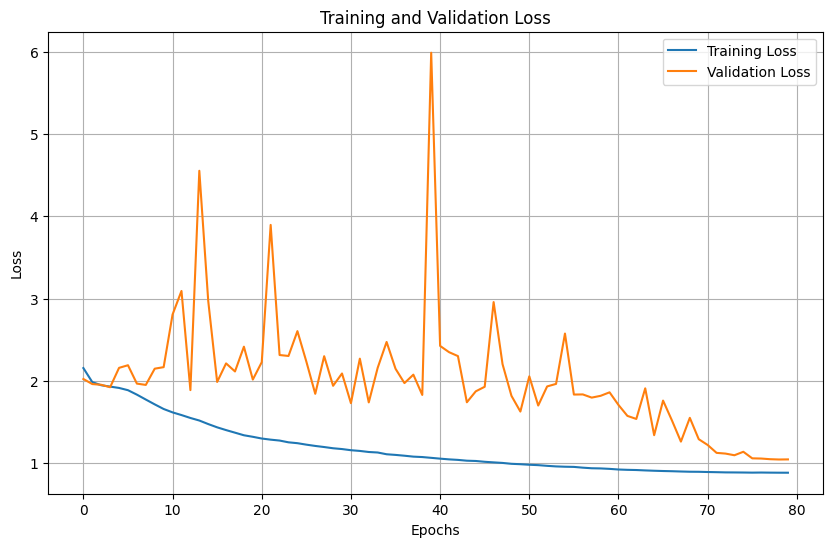

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

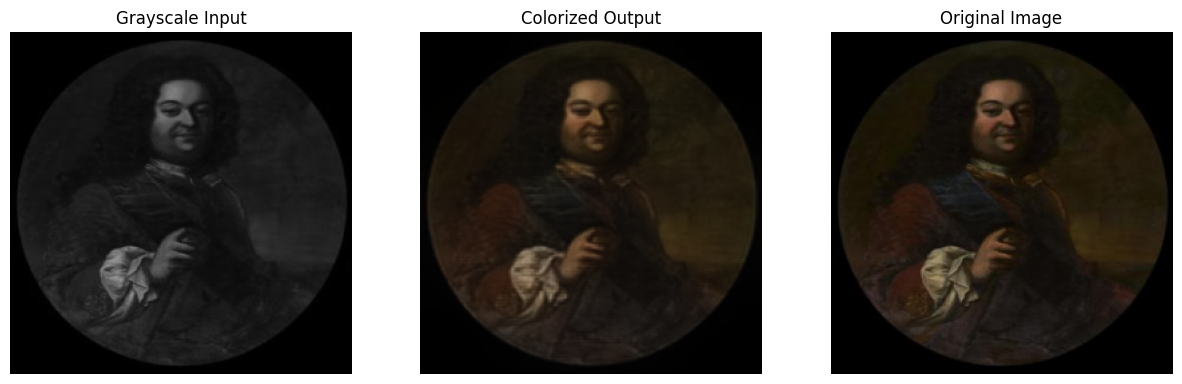

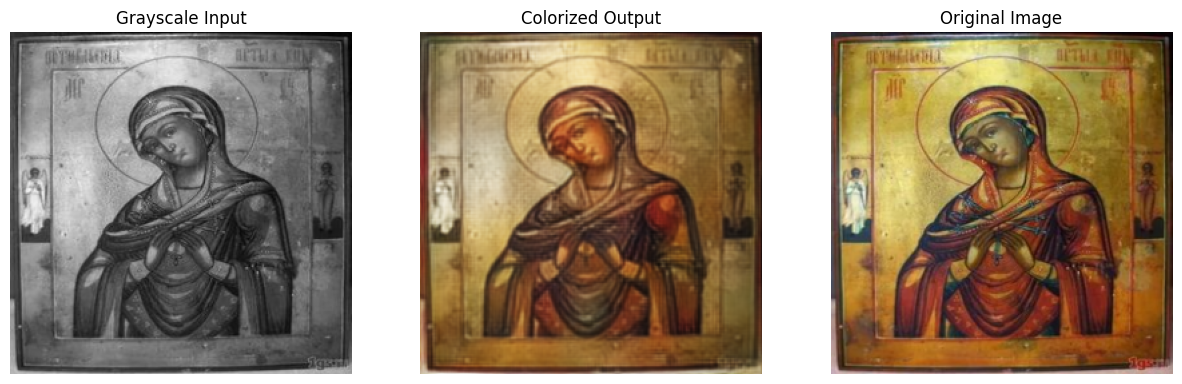

In [ ]:
def visualize_results(grayscale, colorized, original):
    """
    Visualize grayscale input, colorized output, and the original color image.
    """
    with torch.no_grad():
        # Convert to numpy arrays
        grayscale = grayscale.cpu().numpy().transpose((1, 2, 0))
        colorized = colorized.cpu().numpy().transpose((1, 2, 0))
        original = original.cpu().numpy().transpose((1, 2, 0))

        # Plot
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
        ax[0].imshow(grayscale, cmap='gray')
        ax[0].set_title("Grayscale Input")
        ax[0].axis("off")

        ax[1].imshow(colorized)
        ax[1].set_title("Colorized Output")
        ax[1].axis("off")

        ax[2].imshow(original)
        ax[2].set_title("Original Image")
        ax[2].axis("off")

        plt.show()

# Assuming `model`, `validation_loader` are already defined and ready to use
model.eval()
with torch.no_grad():
    # Get a batch from the validation set
    grayscale_inputs, original_colors = next(iter(validation_loader))
    grayscale_inputs, original_colors = grayscale_inputs.cuda(), original_colors.cuda()

    # Generate colorized outputs
    colorized_outputs = model(grayscale_inputs)

    # Visualize the results for the first image in the batch
    visualize_results(grayscale_inputs[1], colorized_outputs[1], original_colors[1])
    visualize_results(grayscale_inputs[10], colorized_outputs[10], original_colors[10])

In [ ]:
model_path = r'/content/drive/MyDrive/DS_301_Project_Group_1_Picture_Colorization/model/artifact/vgg-16_loss=L2PerceptualLoss_batch32_OneCycleLR/model_state_dict.pth'
torch.save(model.state_dict(), model_path)

In [ ]:
import csv

# Specify the path to the CSV file where you want to save the losses
csv_file_path = model_path+'losses.csv'

# Open the file in write mode
with open(csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    # Write the headers
    writer.writerow(['Epoch', 'Training Loss', 'Validation Loss'])

    # Write the losses for each epoch
    for epoch in range(num_epochs):
        writer.writerow([epoch + 1, training_losses[epoch], validation_losses[epoch]])

print(f"Losses saved to {csv_file_path}")

Losses saved to /content/drive/MyDrive/DS_301_Project_Group_1_Picture_Colorization/model/artifact/vgg-16_loss=L2PerceptualLoss_batch32_OneCycleLR/model_state_dict.pthlosses.csv


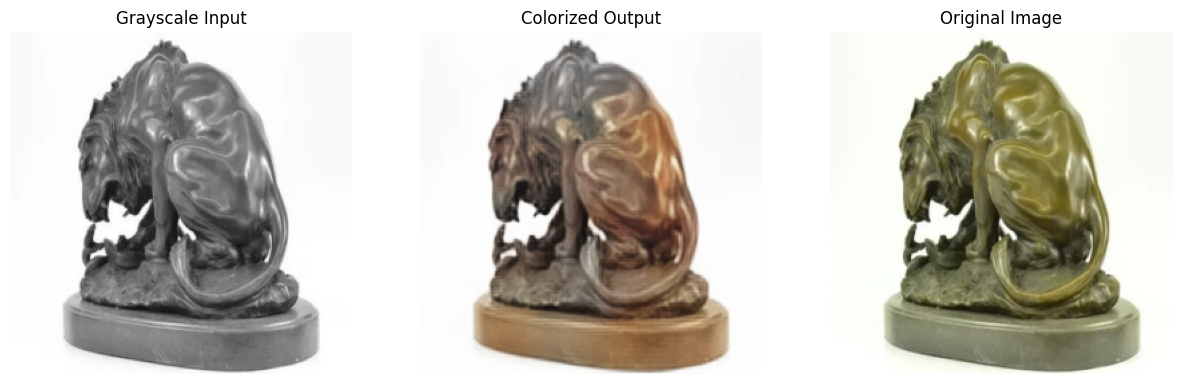

In [ ]:
model = ECCVGenerator().cuda()  # Or just ECCVGenerator() if not using CUDA

# Load the weights back
model.load_state_dict(torch.load(model_path))

# Don't forget to call model.eval() if you're in inference mode
model.eval()
with torch.no_grad():
    # Get a batch from the validation set
    grayscale_inputs, original_colors = next(iter(validation_loader))
    grayscale_inputs, original_colors = grayscale_inputs.cuda(), original_colors.cuda()

    # Generate colorized outputs
    colorized_outputs = model(grayscale_inputs)

    # Visualize the results for the first image in the batch
    visualize_results(grayscale_inputs[5], colorized_outputs[5], original_colors[5])